In [1]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math 
from math import sqrt
%matplotlib inline


We will be investigating the use of Polynomial Regression on the function y = x3. We want to add some randomness to x3, so we will add a fraction of a random value selected from a normal distribution with a standard deviation of 1 centered around 0: 
y = x**3 + 0.5 * np.random.normal(0,1,1)


In [2]:
def y_generator(x):
    return x**3 + 0.5 * np.random.normal(0,1,1)

print(y_generator(10))

[999.32589909]


1. Test Points
Make a list of 10 random points between -2 and 2 (using a uniform distribution). Pass this list into the function described above to get a set of x and y coordinates. Display the (x,y) coordinates as a data frame.


In [3]:
f2 = np.vectorize(y_generator)

np.random.seed(100)

X_training = np.sort(np.random.uniform(-2,2,10))
y_training = f2(X_training)

df_training_set = pd.DataFrame({'X':X_training,'Y':y_training})
print(df_training_set)


          X         Y
0 -1.981125 -7.648125
1 -1.513724 -3.697497
2 -1.453174 -2.851105
3 -0.886522 -0.988535
4 -0.301930  0.380899
5  0.173620  0.341594
6  0.300373 -0.025105
7  0.682996  0.052967
8  1.303411  2.729206
9  1.379105  2.403892


2. Create Graphs
Now, create scatter plots of the (x,y) coordinates and:
a degree 1 (linear) regression model, 
degree 2 (quadratic) regression model, 
degree 3 (cubic) regression model, 
degree 5, and 
degree 9. 
There should be 5 separate graphs for this step each clearly labeled and annotated.


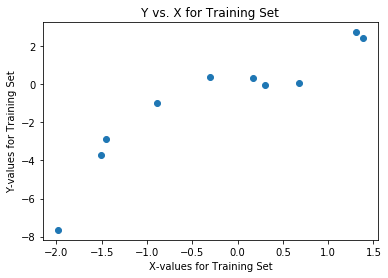

In [4]:
# Create scatter plots of the (x,y) coordinates:

plt.plot(X_training,y_training,'o')
plt.xlabel('X-values for Training Set')
plt.ylabel('Y-values for Training Set')
plt.title('Y vs. X for Training Set')
plt.show()


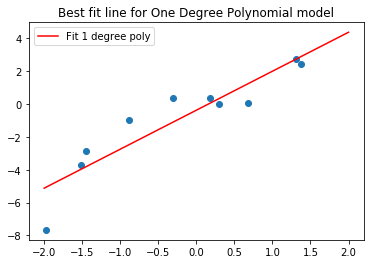

In [5]:
#scatter plot for degree 1 (linear) regression model, 
models = []
X_new = np.linspace(-2,2)

model1 = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', linear_model.LinearRegression())])
model1 =model1.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
models.append(model1)
y_new1 = model1.predict(X_new[:, np.newaxis])

plt.scatter(X_training, y_training)
plt.plot(X_new, y_new1, 'r', label="Fit "+str(1)+ " degree poly")
plt.title('Best fit line for One Degree Polynomial model')
plt.legend()
plt.show()


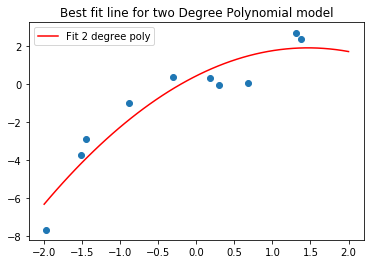

In [6]:
#scatter plot for degree 2 (linear) regression model, 

X_new = np.linspace(-2,2)

model2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', linear_model.LinearRegression())])
model2 =model2.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
models.append(model2)
y_new2 = model2.predict(X_new[:, np.newaxis])

plt.scatter(X_training, y_training)
plt.plot(X_new, y_new2, 'r', label="Fit "+str(2)+ " degree poly")
plt.title('Best fit line for two Degree Polynomial model')
plt.legend()
plt.show()


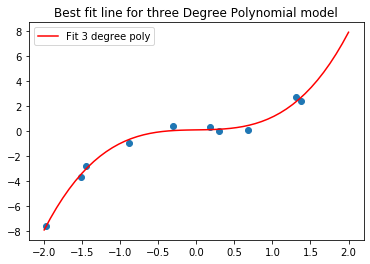

In [7]:
#scatter plot for degree 3 (linear) regression model, 

X_new = np.linspace(-2,2)

model3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression())])
model3 =model3.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
models.append(model3)
y_new3 = model3.predict(X_new[:, np.newaxis])

plt.scatter(X_training, y_training)
plt.plot(X_new, y_new3, 'r', label="Fit "+str(3)+ " degree poly")
plt.title('Best fit line for three Degree Polynomial model')
plt.legend()
plt.show()


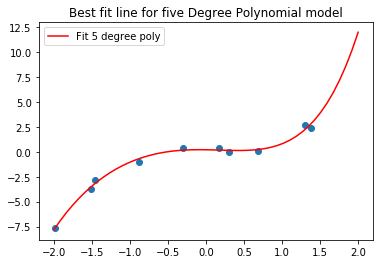

In [8]:
#scatter plot for degree 5 (linear) regression model, 

X_new = np.linspace(-2,2)

model5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', linear_model.LinearRegression())])
model5 =model5.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
models.append(model5)
y_new5 = model5.predict(X_new[:, np.newaxis])

plt.scatter(X_training, y_training)
plt.plot(X_new, y_new5, 'r', label="Fit "+str(5)+ " degree poly")
plt.title('Best fit line for five Degree Polynomial model')
plt.legend()
plt.show()


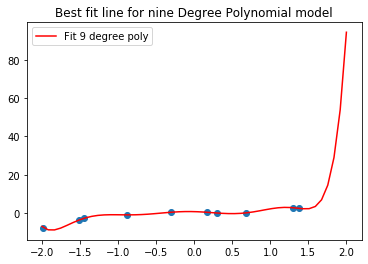

In [9]:
#scatter plot for degree 9 (linear) regression model, 

X_new = np.linspace(-2,2)

model9 = Pipeline([('poly', PolynomialFeatures(degree=9)),('linear', linear_model.LinearRegression())])
model9 =model9.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
models.append(model9)
y_new9 = model9.predict(X_new[:, np.newaxis])

plt.scatter(X_training, y_training)
plt.plot(X_new, y_new9, 'r', label="Fit "+str(9)+ " degree poly")
plt.title('Best fit line for nine Degree Polynomial model')
plt.legend()
plt.show()


3. Combine Graphs
Next, create a single graph that contains all 5 regression models from the last step as well as the (x,y) coordinates. Make sure there is a useful legend as well.


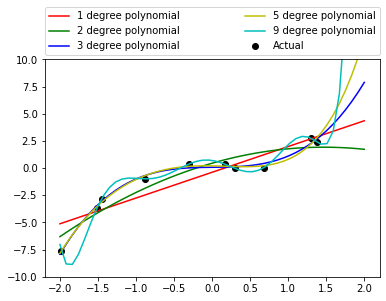

In [10]:
plot_color=['r', 'g', 'b', 'y', 'c']
plt.scatter(X_training, y_training, color = 'black', marker = 'o', label="Actual")


degree = [1,2,3,5,9]
k=0
for i in degree:
    model = Pipeline([('poly', PolynomialFeatures(degree=i)),('linear', linear_model.LinearRegression())])
    model=model.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
    
    Y_pred = model.predict(X_new[:,np.newaxis])
    
    plt.plot(X_new, Y_pred, plot_color[k],label=str(i)+ " degree polynomial")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    
    plt.ylim(-10,10)
    
    k=k+1

plt.show()

4. Test the Models
We want to see which model was the best predictor for our function. Which one do you think would be the best? To figure this out, create a set of 100 x coordinates randomly generated from a uniform distribution between -2 and 2. Then generate the corresponding y coordinates by passing in the x’s to the x3 + (degree of randomness) function from earlier. Display the first few (x,y) coordinates to make sure they are what you expect.

          X         Y
0 -1.977246 -8.582372
1 -0.990295 -1.539296
2  1.182650  0.167469
3 -1.938980 -7.273216
4  0.395374 -0.062639
5  0.415218 -0.153502
6 -1.579409 -3.873676
7 -0.472226 -0.094198
8 -1.854096 -6.215088
9  1.561646  3.432241


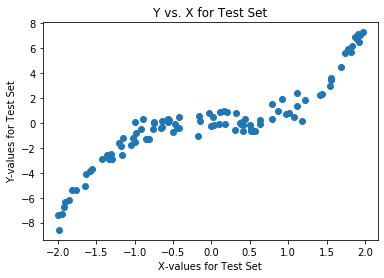

In [11]:
X_test = np.random.uniform(-2,2,100)
y_test = f2(X_test)

df_test_set = pd.DataFrame({'X':X_test,'Y':y_test})
print(df_test_set.head(10))

plt.plot(X_test,y_test,'o')
plt.xlabel('X-values for Test Set')
plt.ylabel('Y-values for Test Set')
plt.title('Y vs. X for Test Set')
plt.show()


5. The Results
To find the best model, we compare the root mean square error for each polynomial regression model. The model with the lowest error is the best!


In [12]:
degrees = [1, 2, 3, 5, 9]

def rms(d):
    y_predictions = models[d].predict(X_test[:, np.newaxis])
    rms = sqrt(mean_squared_error(y_test,y_predictions))
    return rms
for i in degrees:
    print("Root mean square error for " + str(i) + " degree: ", rms(degrees.index(i)))    

Root mean square error for 1 degree:  1.4902410023308104
Root mean square error for 2 degree:  1.8292871801491588
Root mean square error for 3 degree:  0.5385454583069078
Root mean square error for 5 degree:  1.0665111079926162
Root mean square error for 9 degree:  12.374312194588164


Polynomial Regression with degree 3 gives best results.